In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import numba
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("data/train_analysis.csv")

In [3]:
df.head()

,Year,Date-No,Time,Zero-Time,Mean,Solar1,Solar2,Solar3
0,2012,1,0.5,1,0.0,0.0,0.0,NaN
1,2012,1,1.0,1,0.0,0.0,0.0,NaN
2,2012,1,1.5,1,0.0,0.0,0.0,NaN
3,2012,1,2.0,1,0.0,0.0,0.0,NaN
4,2012,1,2.5,1,0.0,0.0,0.0,NaN


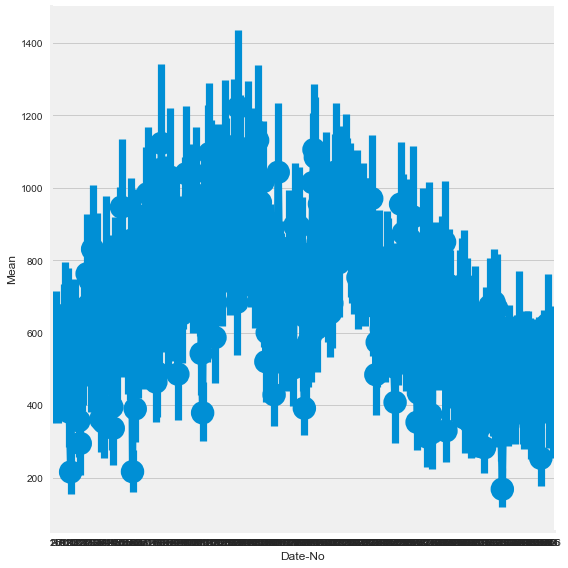

In [4]:
#Date-Noで周期性が取れているか確認
#年内季節性
sns.factorplot('Date-No', 'Mean', size = 8, data=df)

・日ごとの分散が大きすぎて確認が難しい。よってもう少し固める（1週間ごと？）

In [6]:
df['Date-band']=30
for i in range(60):
    df.loc[(df['Date-No']>(7*i))&(df['Date-No']<=(7*(i+1))),'Date-band']= i
df.loc[df['Date-band']==52] = 51

In [7]:
df.groupby('Date-band')['Date-band'].count()

Date-band
0     1344
1     1344
2     1344
3     1344
4     1344
5     1344
6     1344
7     1344
8     1344
9     1344
10    1344
11    1344
12    1344
13    1344
14    1344
15    1344
16    1344
17    1344
18    1344
19    1344
20    1344
21    1344
22    1344
23    1344
24    1344
25    1344
26    1344
27    1344
28    1344
29    1344
30    1344
31    1344
32    1344
33    1344
34    1344
35    1344
36    1344
37    1344
38    1344
39    1344
40    1344
41    1344
42    1344
43    1344
44    1344
45    1344
46    1344
47    1344
48    1344
49    1344
50    1344
51    1584
Name: Date-band, dtype: int64

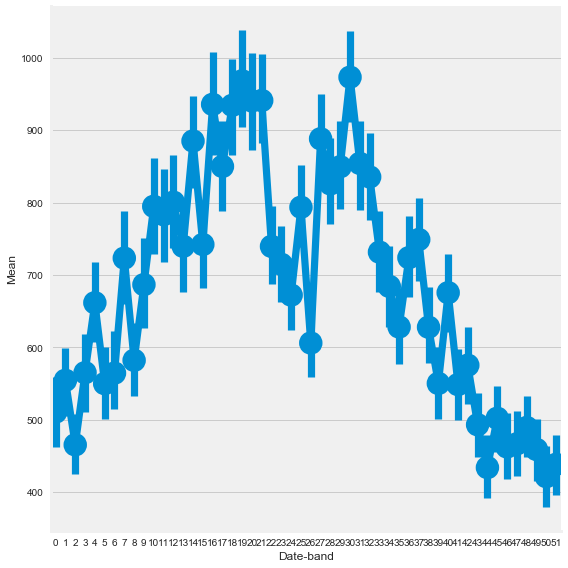

In [8]:
#Date-bandで周期性が取れているか確認
#年内季節性
sns.factorplot('Date-band', 'Mean', size = 8, data=df)

・それなりに明瞭な季節性を確認。実際の分析はDate-Noでいいかも。

In [5]:
#予報データを加える
df.head()

,Year,Date-No,Time,Zero-Time,Mean,Solar1,Solar2,Solar3
0,2012,1,0.5,1,0.0,0.0,0.0,NaN
1,2012,1,1.0,1,0.0,0.0,0.0,NaN
2,2012,1,1.5,1,0.0,0.0,0.0,NaN
3,2012,1,2.0,1,0.0,0.0,0.0,NaN
4,2012,1,2.5,1,0.0,0.0,0.0,NaN


In [3]:
df_k = df.ix[:,['Year', 'Date-No', 'Time', 'Mean', 'Solar1', 'Solar2']]
df_y = df.ix[:,['Year', 'Date-No', 'Time', 'Mean', 'Solar3']]

In [4]:
from filer3 import Filer

data = Filer.read_tsv('data/forecast_kanagawa.tsv')
df_fk = pd.DataFrame(data[1:], columns = data[0])
data = Filer.read_tsv('data/forecast_yamanashi.tsv')
df_fy = pd.DataFrame(data[1:], columns = data[0])

In [5]:
pd.set_option('display.max_columns', None)
df_fk.head()

,date,weather,weather_detail,wind,wave,pc_00-06,pc_06-12,pc_12-18,pc_18-24,we_00-03,we_03-06,we_06-09,we_09-12,we_12-15,we_15-18,we_18-21,we_21-24,wv_00-03,wv_03-06,wv_06-09,wv_09-12,wv_12-15,wv_15-18,wv_18-21,wv_21-24,wc_00-03,wc_03-06,wc_06-09,wc_09-12,wc_12-15,wc_15-18,wc_18-21,wc_21-24,min_tp,max_tp,tp_00-03,tp_03-06,tp_06-09,tp_09-12,tp_12-15,tp_15-18,tp_18-21,tp_21-24
0,2012-01-01,くもり,くもり 所により 朝晩 雨か雪,北の風 後 南西の風,０．５メートル 後 １メートル,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,3,10,5,4,4,6,9,10,9,9
1,2012-01-02,くもり後晴れ,くもり 昼前 から 晴れ,北の風 日中 やや強く,１メートル 後 １．５メートル,20,20,10,10,くもり,くもり,くもり,晴れ,晴れ,晴れ,晴れ,くもり,北,北,北,北,北,北,北,北,2,2,3,4,4,4,3,2,5,11,8,7,6,7,10,10,8,6
2,2012-01-03,晴れ後くもり,晴れ 昼過ぎ から くもり,北の風 やや強く,１メートル 後 ０．５メートル,0,0,10,10,晴れ,晴れ,晴れ,晴れ,くもり,くもり,くもり,くもり,北西,北,北,北,東,北東,北東,北,4,4,4,2,1,1,1,2,2,9,4,3,3,4,8,9,7,6
3,2012-01-04,晴れ後くもり,晴れ 昼過ぎ から くもり 所により 夕方 雨か雪,北の風 日中 西の風 海上 では 西の風 やや強く,１メートル 後 ２メートル,10,10,30,20,くもり,晴れ,晴れ,晴れ,くもり,くもり,くもり,くもり,北,北,北,西,西,北,北,北,2,1,2,2,2,3,3,2,2,10,5,4,3,5,9,10,5,4
4,2012-01-05,晴れ,晴れ,北の風 はじめ やや強く,１．５メートル 後 １メートル,10,0,0,0,晴れ,晴れ,晴れ,晴れ,晴れ,晴れ,晴れ,晴れ,北,北,北,北,北西,北西,北,北,4,4,2,2,2,2,2,2,1,8,3,2,1,3,7,7,5,4


In [6]:
df_fk['Year'] = df_fk['date'].map(lambda x : x[0:4])
df_fk['Month'] = df_fk['date'].map(lambda x : x[5:7])
df_fk['Date'] = df_fk['date'].map(lambda x : x[8:10])
df_fy['Year'] = df_fy['date'].map(lambda x : x[0:4])
df_fy['Month'] = df_fy['date'].map(lambda x : x[5:7])
df_fy['Date'] = df_fy['date'].map(lambda x : x[8:10])

In [7]:
df_fk = df_fk.drop(['date', 'weather', 'weather_detail', 'wind', 'min_tp', 'max_tp'], axis=1)
df_fy = df_fy.drop(['date', 'weather', 'weather_detail', 'wind', 'min_tp', 'max_tp'], axis=1)

In [11]:
df_fy.head()

,wave,pc_00-06,pc_06-12,pc_12-18,pc_18-24,we_00-03,we_03-06,we_06-09,we_09-12,we_12-15,we_15-18,we_18-21,we_21-24,wv_00-03,wv_03-06,wv_06-09,wv_09-12,wv_12-15,wv_15-18,wv_18-21,wv_21-24,wc_00-03,wc_03-06,wc_06-09,wc_09-12,wc_12-15,wc_15-18,wc_18-21,wc_21-24,tp_00-03,tp_03-06,tp_06-09,tp_09-12,tp_12-15,tp_15-18,tp_18-21,tp_21-24,Year,Month,Date
0,,10,10,10,20,くもり,くもり,くもり,くもり,晴れ,くもり,晴れ,くもり,南西,南西,南西,南西,南西,北西,北西,北西,2,2,2,2,2,2,2,2,1,0,0,2,6,8,7,5,2012,01,01
1,,10,10,0,10,くもり,くもり,晴れ,晴れ,晴れ,晴れ,晴れ,くもり,西,北西,北西,北西,北西,北西,北西,北西,2,2,3,4,4,4,3,2,3,1,1,5,8,9,5,2,2012,01,02
2,,10,0,10,10,晴れ,晴れ,晴れ,晴れ,晴れ,くもり,くもり,くもり,北西,北西,北西,北西,北西,北西,北西,北西,2,2,2,2,2,2,2,2,-1,-1,-2,2,7,9,4,2,2012,01,03
3,,10,10,20,10,くもり,晴れ,晴れ,晴れ,くもり,くもり,晴れ,晴れ,北西,北西,北西,北西,北西,北西,北西,北西,1,1,1,2,3,4,4,1,2,-1,-1,1,6,8,5,1,2012,01,04
4,,0,0,0,0,晴れ,晴れ,晴れ,晴れ,晴れ,晴れ,晴れ,晴れ,北西,北西,北西,北西,北西,北西,北西,北西,1,1,2,2,3,4,2,1,-1,-3,-4,-2,7,7,3,1,2012,01,05


In [8]:
df_fy['Year'] = df_fy['Year'].map(lambda x: int(x))
df_fy['Month'] = df_fy['Month'].map(lambda x: int(x))
df_fy['Date'] = df_fy['Date'].map(lambda x: int(x))

df_fk['Year'] = df_fk['Year'].map(lambda x: int(x))
df_fk['Month'] = df_fk['Month'].map(lambda x: int(x))
df_fk['Date'] = df_fk['Date'].map(lambda x: int(x))

In [9]:
def MtoD(month, year):
    
    x = int(month)
    y = int(year)
    r = 0
    
    if x >= 2:
        r = r + 31
        
        if x >= 3:
            if y % 4 == 0:
                r = r + 29
            else:
                r = r + 28
            
            if x >= 4:
                r = r + 31
                if x >= 5:
                    r = r + 30
                    if x >= 6:
                        r = r + 31
                        if x >= 7:
                            r = r + 30
                            if x >= 8:
                                r = r + 31
                                if x >= 9:
                                    r = r + 31
                                    if x >= 10:
                                        r = r + 30
                                        if x >= 11:
                                            r = r + 31
                                            if x == 12:
                                                r = r + 30
    return r

In [10]:
dfs = [df_fy, df_fk]

for df in dfs:


    df['Date-No'] = 0

    M = df['Month']
    D = df['Date']
    Y = df['Year']

    @numba.jit
    def Make_DateNo(M,D,Y):
        Date_No = np.zeros(len(D))
        for i in tqdm(range(len(D))):
            Date_No[i] = MtoD(M[i],Y[i]) + D[i]
        return Date_No


    df['Date-No'] = Make_DateNo(M,D,Y)
    df['Date-No'] = df['Date-No'].map(lambda x: int(x))
    df = df.drop(["Month", "Date"], axis=1)

100%|██████████| 1917/1917 [00:00<00:00, 23976.24it/s]


In [11]:
df_k = pd.merge(df_k, df_fk, on=['Year', 'Date-No'])
df_y = pd.merge(df_y, df_fy, on=['Year', 'Date-No'])

以上でforecastをmergeできた。次に、df_k（kanagawa）のwaveを整理する。

In [12]:
df_k['wave_'] = df_k['wave'].map(lambda x: x.split('後'))
df_k['wave_f'] = df_k['wave_'].map(lambda x: x[0])
df_k['wave_l'] = df_k['wave_'].map(lambda x: x[1] if len(x) == 2 else x[0])
df_k = df_k.drop(['wave', 'wave_'], axis=1)

In [13]:
df_k['wave_f'] = df_k['wave_f'].map(lambda x: (x.split('メートル'))[0] )
df_k['wave_l'] = df_k['wave_l'].map(lambda x: (x.split('メートル'))[0] )

In [14]:
lis = ['wave_f', 'wave_l']
for a in lis:
    df_k.loc[df_k[a] == "　０．５", a]= 0.5 
    df_k.loc[df_k[a] == "　１", a]= 1
    df_k.loc[df_k[a] == "　１．５", a]= 1.5 
    df_k.loc[df_k[a] == "　２", a]= 2
    df_k.loc[df_k[a] == "　２．５", a]= 2.5
    df_k.loc[df_k[a] == "　３", a]= 3
    df_k.loc[df_k[a] == "　４", a]= 4
    df_k.loc[df_k[a] == "　５", a]= 5 
    df_k.loc[df_k[a] == "　６", a]= 6 
    df_k.loc[df_k[a] == "　７", a]= 7
    df_k.loc[df_k[a] == "　８", a]= 8
    df_k.loc[df_k[a] == "　１０", a]= 10 

In [15]:
df_k.head()

,Year,Date-No,Time,Mean,Solar1,Solar2,pc_00-06,pc_06-12,pc_12-18,pc_18-24,we_00-03,we_03-06,we_06-09,we_09-12,we_12-15,we_15-18,we_18-21,we_21-24,wv_00-03,wv_03-06,wv_06-09,wv_09-12,wv_12-15,wv_15-18,wv_18-21,wv_21-24,wc_00-03,wc_03-06,wc_06-09,wc_09-12,wc_12-15,wc_15-18,wc_18-21,wc_21-24,tp_00-03,tp_03-06,tp_06-09,tp_09-12,tp_12-15,tp_15-18,tp_18-21,tp_21-24,Month,Date,wave_f,wave_l
0,2012,1,0.5,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1
1,2012,1,1.0,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1
2,2012,1,1.5,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1
3,2012,1,2.0,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1
4,2012,1,2.5,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1


In [16]:
df_k['pc_00-06'] = df_k['pc_00-06'].map(lambda x: int(x))
df_k['pc_06-12'] = df_k['pc_06-12'].map(lambda x: int(x))
df_k['pc_12-18'] = df_k['pc_12-18'].map(lambda x: int(x))
df_k['pc_18-24'] = df_k['pc_18-24'].map(lambda x: int(x))
df_y['pc_00-06'] = df_y['pc_00-06'].map(lambda x: int(x))
df_y['pc_06-12'] = df_y['pc_06-12'].map(lambda x: int(x))
df_y['pc_12-18'] = df_y['pc_12-18'].map(lambda x: int(x))
df_y['pc_18-24'] = df_y['pc_18-24'].map(lambda x: int(x))

In [17]:
df_k['Rain'] = 0
df_k.loc[(df_k['Time']>0)&(df_k['Time']<6), 'Rain']= df_k['pc_00-06']
df_k.loc[(df_k['Time']>6)&(df_k['Time']<12), 'Rain']= df_k['pc_06-12']
df_k.loc[(df_k['Time']>12)&(df_k['Time']<18), 'Rain']= df_k['pc_12-18']
df_k.loc[(df_k['Time']>18)&(df_k['Time']<=24), 'Rain']= df_k['pc_18-24']


df_y['Rain'] = 0
df_y.loc[(df_y['Time']>0)&(df_y['Time']<6), 'Rain']= df_y['pc_00-06']
df_y.loc[(df_y['Time']>6)&(df_y['Time']<12), 'Rain']= df_y['pc_06-12']
df_y.loc[(df_y['Time']>12)&(df_y['Time']<18), 'Rain']= df_y['pc_12-18']
df_y.loc[(df_y['Time']>18)&(df_y['Time']<=24), 'Rain']= df_y['pc_18-24']

In [18]:
df_k.loc[df_k['Time'] == 6, 'Rain']= (df_k['pc_00-06'] + df_k['pc_06-12']) / 2
df_k.loc[df_k['Time'] == 12, 'Rain']= (df_k['pc_12-18'] + df_k['pc_06-12']) / 2
df_k.loc[df_k['Time'] == 18, 'Rain']= (df_k['pc_12-18'] + df_k['pc_18-24']) / 2
df_y.loc[df_y['Time'] == 6, 'Rain']= (df_y['pc_00-06'] + df_y['pc_06-12']) / 2
df_y.loc[df_y['Time'] == 12, 'Rain']= (df_y['pc_12-18'] + df_y['pc_06-12']) / 2
df_y.loc[df_y['Time'] == 18, 'Rain']= (df_y['pc_12-18'] + df_y['pc_18-24']) / 2

In [19]:
df_k.head()

,Year,Date-No,Time,Mean,Solar1,Solar2,pc_00-06,pc_06-12,pc_12-18,pc_18-24,we_00-03,we_03-06,we_06-09,we_09-12,we_12-15,we_15-18,we_18-21,we_21-24,wv_00-03,wv_03-06,wv_06-09,wv_09-12,wv_12-15,wv_15-18,wv_18-21,wv_21-24,wc_00-03,wc_03-06,wc_06-09,wc_09-12,wc_12-15,wc_15-18,wc_18-21,wc_21-24,tp_00-03,tp_03-06,tp_06-09,tp_09-12,tp_12-15,tp_15-18,tp_18-21,tp_21-24,Month,Date,wave_f,wave_l,Rain
0,2012,1,0.5,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1,30.0
1,2012,1,1.0,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1,30.0
2,2012,1,1.5,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1,30.0
3,2012,1,2.0,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1,30.0
4,2012,1,2.5,0.0,0.0,0.0,30,30,10,30,くもり,くもり,くもり,くもり,くもり,くもり,くもり,晴れ,北,北,北,南西,南西,南西,南西,西,2,2,2,2,3,3,3,2,5,4,4,6,9,10,9,9,1,1,０．５,1,30.0


In [20]:
dfs = [df_k, df_y]
lis = ['we_00-03', 'we_03-06', 'we_06-09', 'we_09-12', 'we_12-15', 'we_15-18', 'we_18-21', 'we_21-24']

for df in dfs:
    for a in lis:
        df.loc[df[a] == 'くもり', a]= 1
        df.loc[df[a] == '晴れ', a]= 0
        df.loc[df[a] == '雨', a]= 2
        df.loc[df[a] == '雪', a]= 3

In [21]:
for df in dfs:
    df.loc[df['Time'] <=24 , 'Weather'] = df[lis[7]]
    df.loc[df['Time'] <=21 , 'Weather'] = df[lis[6]]
    df.loc[df['Time'] <=18 , 'Weather'] = df[lis[5]]
    df.loc[df['Time'] <=15 , 'Weather'] = df[lis[4]]
    df.loc[df['Time'] <=12 , 'Weather'] = df[lis[3]]
    df.loc[df['Time'] <=9 , 'Weather'] = df[lis[2]]
    df.loc[df['Time'] <=6 , 'Weather'] = df[lis[1]]
    df.loc[df['Time'] <=3 , 'Weather'] = df[lis[0]]

In [22]:
lis = ['tp_00-03', 'tp_03-06', 'tp_06-09', 'tp_09-12', 'tp_12-15', 'tp_15-18', 'tp_18-21', 'tp_21-24']
for df in dfs:
    df.loc[df['Time'] <=24 , 'Temp'] = df[lis[7]]
    df.loc[df['Time'] <=21 , 'Temp'] = df[lis[6]]
    df.loc[df['Time'] <=18 , 'Temp'] = df[lis[5]]
    df.loc[df['Time'] <=15 , 'Temp'] = df[lis[4]]
    df.loc[df['Time'] <=12 , 'Temp'] = df[lis[3]]
    df.loc[df['Time'] <=9 , 'Temp'] = df[lis[2]]
    df.loc[df['Time'] <=6 , 'Temp'] = df[lis[1]]
    df.loc[df['Time'] <=3 , 'Temp'] = df[lis[0]]

In [23]:
df_y.head()

,Year,Date-No,Time,Mean,Solar3,wave,pc_00-06,pc_06-12,pc_12-18,pc_18-24,we_00-03,we_03-06,we_06-09,we_09-12,we_12-15,we_15-18,we_18-21,we_21-24,wv_00-03,wv_03-06,wv_06-09,wv_09-12,wv_12-15,wv_15-18,wv_18-21,wv_21-24,wc_00-03,wc_03-06,wc_06-09,wc_09-12,wc_12-15,wc_15-18,wc_18-21,wc_21-24,tp_00-03,tp_03-06,tp_06-09,tp_09-12,tp_12-15,tp_15-18,tp_18-21,tp_21-24,Month,Date,Rain,Weather,Temp
0,2012,1,0.5,0.0,NaN,,10,10,10,20,1,1,1,1,0,1,0,1,南西,南西,南西,南西,南西,北西,北西,北西,2,2,2,2,2,2,2,2,1,0,0,2,6,8,7,5,1,1,10.0,1,1
1,2012,1,1.0,0.0,NaN,,10,10,10,20,1,1,1,1,0,1,0,1,南西,南西,南西,南西,南西,北西,北西,北西,2,2,2,2,2,2,2,2,1,0,0,2,6,8,7,5,1,1,10.0,1,1
2,2012,1,1.5,0.0,NaN,,10,10,10,20,1,1,1,1,0,1,0,1,南西,南西,南西,南西,南西,北西,北西,北西,2,2,2,2,2,2,2,2,1,0,0,2,6,8,7,5,1,1,10.0,1,1
3,2012,1,2.0,0.0,NaN,,10,10,10,20,1,1,1,1,0,1,0,1,南西,南西,南西,南西,南西,北西,北西,北西,2,2,2,2,2,2,2,2,1,0,0,2,6,8,7,5,1,1,10.0,1,1
4,2012,1,2.5,0.0,NaN,,10,10,10,20,1,1,1,1,0,1,0,1,南西,南西,南西,南西,南西,北西,北西,北西,2,2,2,2,2,2,2,2,1,0,0,2,6,8,7,5,1,1,10.0,1,1


In [24]:
df_k.loc[df_k['Time'] <=12 , 'Wave'] = df_k['wave_f']
df_k.loc[df_k['Time'] > 12 , 'Wave'] = df_k['wave_l']

In [25]:
df_k = df_k.ix[:,['Solar1', 'Solar2', 'Mean', 'Year', 'Date-No', 'Time', 'Rain', 'Weather', 'Temp']]
df_y = df_y.ix[:,['Solar3', 'Mean', 'Year', 'Date-No', 'Time', 'Rain', 'Weather', 'Temp']]

In [26]:
df_k.head()

,Solar1,Solar2,Mean,Year,Date-No,Time,Rain,Weather,Temp
0,0.0,0.0,0.0,2012,1,0.5,30.0,1,5
1,0.0,0.0,0.0,2012,1,1.0,30.0,1,5
2,0.0,0.0,0.0,2012,1,1.5,30.0,1,5
3,0.0,0.0,0.0,2012,1,2.0,30.0,1,5
4,0.0,0.0,0.0,2012,1,2.5,30.0,1,5


In [27]:
df_y.head()

,Solar3,Mean,Year,Date-No,Time,Rain,Weather,Temp
0,NaN,0.0,2012,1,0.5,10.0,1,1
1,NaN,0.0,2012,1,1.0,10.0,1,1
2,NaN,0.0,2012,1,1.5,10.0,1,1
3,NaN,0.0,2012,1,2.0,10.0,1,1
4,NaN,0.0,2012,1,2.5,10.0,1,1


In [28]:
#一旦保存
df_k.to_csv("train_kanagawa.csv", index = False,  header = True)
df_y.to_csv("train_yamanashi.csv", index = False,  header = True)